# RF and ensemble 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
pwd 

'/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week8/sians_notebooks'

In [3]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week8


In [4]:
cd Datasources/RF-data/

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week8/Datasources/RF-data


In [5]:
ls

categorical.csv    numerical.csv      numerical.csv.zip  target.csv


In [6]:
cat=pd.read_csv('categorical.csv')
num=pd.read_csv('numerical.csv')
target=pd.read_csv('target.csv')

In [7]:
#concat them together 
data=pd.concat([num,cat,target],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 339 entries, TCODE to TARGET_D
dtypes: float64(10), int64(322), object(7)
memory usage: 246.8+ MB


In [9]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0


In [13]:
lst=data.columns.to_list()

In [14]:
lst

['TCODE',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 'DW4',
 'DW5',
 'DW6',
 'DW7',
 'DW8',
 'DW9',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU3',
 'HU4',
 'HU5',
 'HHD1',
 'HHD2',
 'HHD3',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD

In [10]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

## correcting the imbalance 

In [16]:
#downsample using logic 

category_0=data[data['TARGET_B']==0].sample(len(data[data['TARGET_B']==1]))

In [17]:
category_1=(data[data['TARGET_B']==1])

In [18]:
data=pd.concat([category_0,category_1],axis=0)
data.reset_index(inplace=True,drop=True)
data.shape

(9686, 339)

In [19]:
data['TARGET_B'].value_counts()

0    4843
1    4843
Name: TARGET_B, dtype: int64

## pre processing 

In [38]:
y=data['TARGET_B']
X=data.drop(['TARGET_B'],axis=1)

In [30]:
numericals=X.select_dtypes(np.number)
categoricals=X.select_dtypes(object)

In [31]:
# one hot encoder 
from sklearn.preprocessing import OneHotEncoder as ohe
encoder = ohe(drop='first').fit(categoricals)
cat_enc=encoder.transform(categoricals).toarray()
cat_enc_cols=encoder.get_feature_names_out(categoricals.columns)
cat_enc_df=pd.DataFrame(cat_enc, columns=cat_enc_cols)

In [32]:
categoricals.shape

(9686, 7)

In [33]:
cat_enc.shape

(9686, 24)

In [34]:
#join back to the numbers 
X_full=pd.concat([cat_enc_df,numericals],axis=1)

In [35]:
X_full.shape # too many columns 

(9686, 355)

## train test split and model 

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.3, random_state=40)

In [45]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf=rfc(n_estimators=50, max_depth=5,random_state=40)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9920853406744666


### cross validation 

- proxy test for overfit 

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_scores=cross_val_score(clf,X_train,y_train,cv=10)
np.mean(cross_val_scores)

0.9936578171091446

# feature importances 

In [47]:
feature_importances=clf.feature_importances_

In [48]:
feature_names = X_full.columns

In [49]:
forest_importances = pd.Series(feature_importances, index=feature_names)

In [50]:
forest_importances

STATE_FL        0.000000
STATE_GA        0.000000
STATE_IL        0.000000
STATE_IN        0.000000
STATE_MI        0.000000
                  ...   
LASTDATE_YR     0.001901
LASTDATE_MM     0.002407
FIRSTDATE_YR    0.004654
FIRSTDATE_MM    0.000676
TARGET_D        0.478181
Length: 355, dtype: float64

In [53]:
forest_importances.sort_values(ascending=False)

TARGET_D    0.478181
RFA_2F      0.034793
LASTGIFT    0.025739
AVGGIFT     0.021524
CARDGIFT    0.014654
              ...   
STATE_GA    0.000000
IC14        0.000000
HUPA7       0.000000
DW9         0.000000
IC18        0.000000
Length: 355, dtype: float64

In [54]:
with pd.option_context('display.max_rows', None) :
    print(forest_importances.sort_values(ascending=False))

TARGET_D        0.478181
RFA_2F          0.034793
LASTGIFT        0.025739
AVGGIFT         0.021524
CARDGIFT        0.014654
NGIFTALL        0.014376
MAXRAMNT        0.013408
RFA_2A_G        0.009827
NUMPRM12        0.006647
NUMPROM         0.006332
CONTROLN        0.005692
ETH13           0.004807
MINRAMNT        0.004802
ETHC3           0.004671
FIRSTDATE_YR    0.004654
CARDPROM        0.004317
EC5             0.004244
RAMNTALL        0.004129
ODATEW_YR       0.004120
ETH2            0.003857
AGEC7           0.003648
HU2             0.003559
DMA             0.003403
HHD4            0.003206
HIT             0.003191
HVP5            0.003162
CHILC4          0.003100
HV1             0.003061
IC1             0.003044
HHAS3           0.002974
CARDPM12        0.002755
HHD7            0.002736
MINRDATE_MM     0.002702
RHP1            0.002689
HVP3            0.002660
IC7             0.002634
VC1             0.002616
LFC7            0.002579
TPE1            0.002577
HVP4            0.002550


In [55]:
import time
start_time = time.time()
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [56]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.197 seconds


In [58]:
import matplotlib.pyplot as plt 

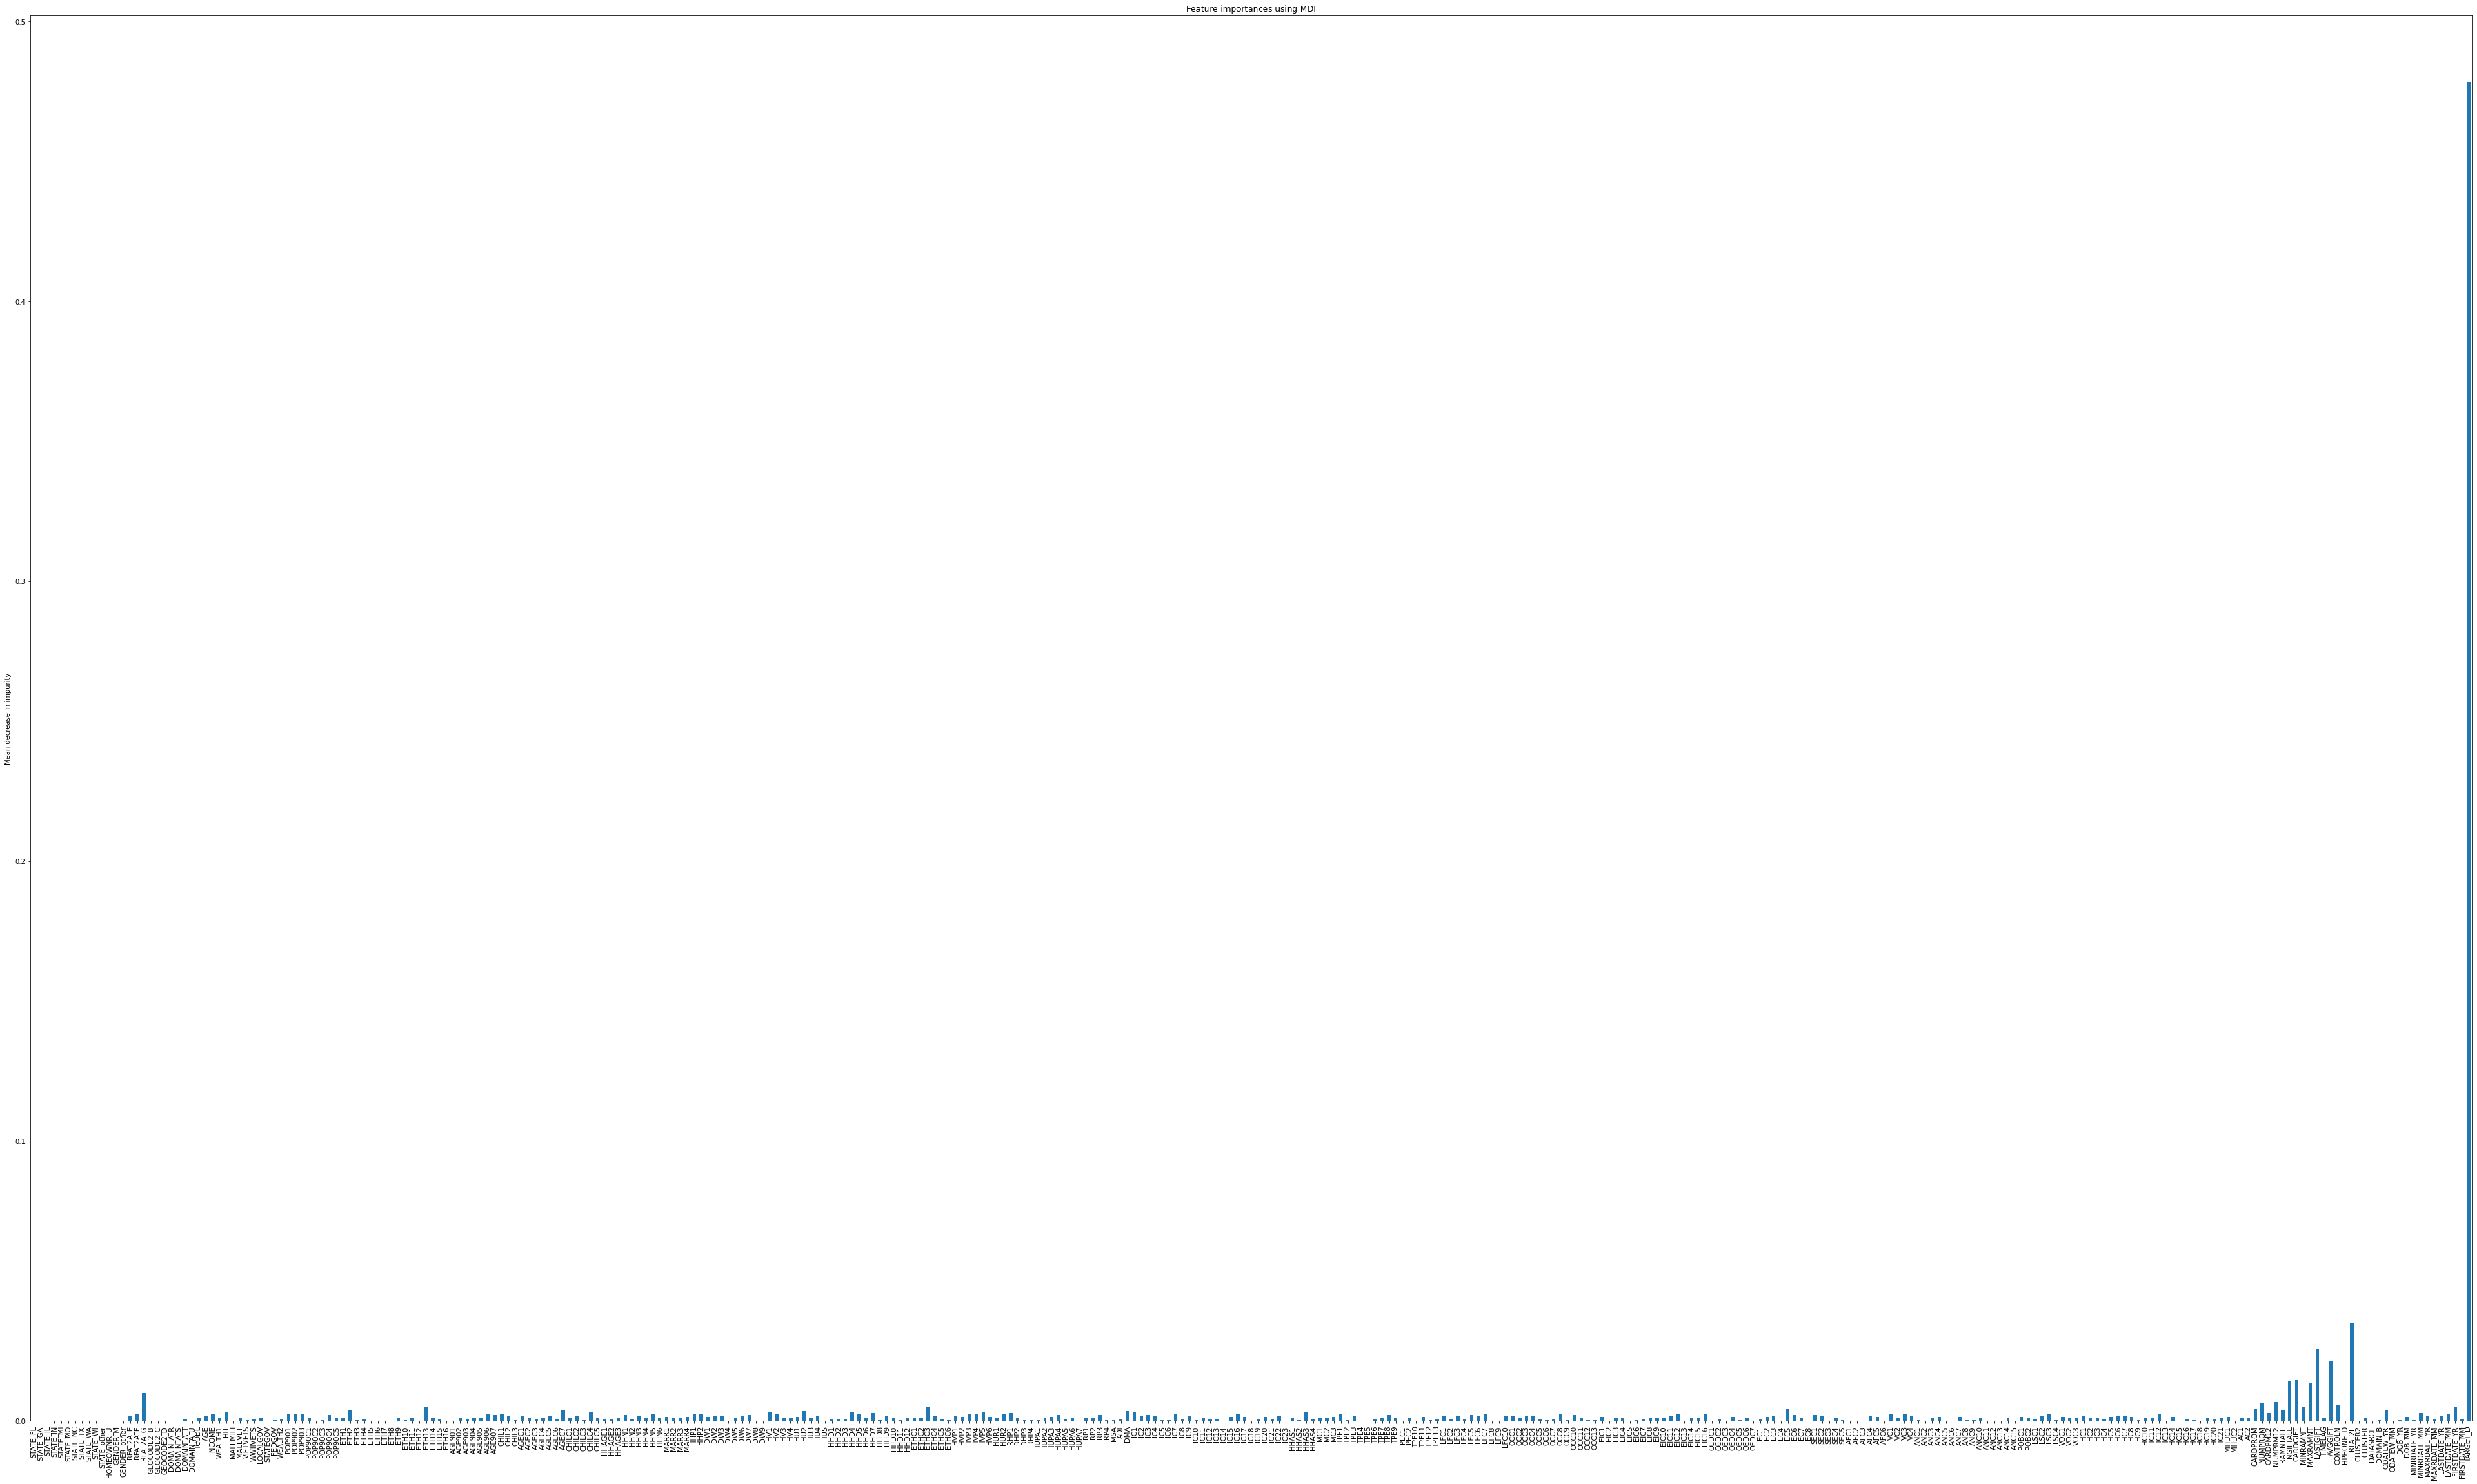

In [59]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(50,30))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()